# 📊 Employee Turnover Prediction - Exploratory Data Analysis

Welcome to the **Employee Turnover Prediction** project! In this notebook, we'll explore our dataset to understand employee behavior patterns and identify factors that contribute to employee turnover.

## 🎯 **Learning Objectives**
By the end of this notebook, you will understand:
1. How to load and inspect employee data
2. How to identify data quality issues (missing values, duplicates)
3. How to analyze numerical and categorical features
4. How to detect patterns in employee turnover
5. How to create visualizations for data insights

## 📝 **What is Exploratory Data Analysis (EDA)?**
EDA is like being a detective 🕵️‍♂️ - we examine the data to:
- **Understand** what we're working with
- **Discover** hidden patterns and relationships
- **Identify** problems that need fixing
- **Get insights** before building ML models

Let's start our investigation! 🚀

In [1]:
# 🔧 Step 1: Setup and Imports
# This section imports all the tools we need for data analysis

import pandas as pd              # For data manipulation (like Excel but more powerful)
import numpy as np               # For numerical operations and arrays
import matplotlib.pyplot as plt  # For creating charts and graphs
import seaborn as sns           # For beautiful statistical visualizations
import warnings                 # To hide unnecessary warning messages

# Configure settings for better output
plt.style.use('default')        # Set a clean chart style
sns.set_palette("husl")         # Set attractive colors for charts
warnings.filterwarnings('ignore') # Hide warning messages for cleaner output

# Configure pandas to show more data
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # No width limit
pd.set_option('display.max_colwidth', 100)  # Max column width

print("✅ All libraries imported successfully!")
print("📊 Ready to start data exploration!")

✅ All libraries imported successfully!
📊 Ready to start data exploration!


## 📁 Step 2: Loading the Data

Now let's load our employee dataset. Think of this as opening a spreadsheet with information about employees.

**What we're looking for:**
- How many employees are in our dataset?
- What information do we have about each employee?
- Are there any obvious problems with the data?

In [2]:
# 📂 Load the employee dataset
# We're loading a CSV file (Comma Separated Values) - like a simple spreadsheet

# File path to our data (relative to the notebooks folder)
data_path = '../data/raw/employee_data.csv'

# Load the data using pandas
# pandas.read_csv() reads CSV files and creates a DataFrame (like a smart table)
df = pd.read_csv(data_path)

# Let's see what we loaded
print("🎉 Data loaded successfully!")
print(f"📊 Dataset shape: {df.shape}")  # (rows, columns)
print(f"👥 Number of employees: {df.shape[0]:,}")
print(f"📋 Number of features/columns: {df.shape[1]}")

# Show the first few rows to see what our data looks like
print("\n📋 First 5 rows of our dataset:")
df.head()

🎉 Data loaded successfully!
📊 Dataset shape: (11582, 10)
👥 Number of employees: 11,582
📋 Number of features/columns: 10

📋 First 5 rows of our dataset:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0.0,sales,low
1,0.80,0.86,5,262,6,0,1,0.0,sales,medium
2,0.11,0.88,7,272,4,0,1,0.0,sales,medium
3,0.72,0.87,5,223,5,0,1,0.0,sales,low
4,0.37,0.52,2,159,3,0,1,0.0,sales,low


In [3]:
# 🔍 Let's understand what each column means
print("📋 COLUMN EXPLANATION:")
print("="*50)

column_explanations = {
    'satisfaction_level': '😊 How satisfied the employee is (0-1 scale)',
    'last_evaluation': '📈 Performance rating from last review (0-1 scale)', 
    'number_project': '📊 Number of projects assigned to employee',
    'average_montly_hours': '⏰ Average monthly working hours',
    'time_spend_company': '📅 Number of years at the company',
    'Work_accident': '⚠️ Whether employee had work accident (0=No, 1=Yes)',
    'promotion_last_5years': '🚀 Promoted in last 5 years (0=No, 1=Yes)',
    'department': '🏢 Which department employee works in',
    'salary': '💰 Salary level (low, medium, high)',
    'quit': '🚪 Target variable - Did employee quit? (0=No, 1=Yes)'
}

for col, explanation in column_explanations.items():
    if col in df.columns:
        print(f"{col:20} → {explanation}")

print(f"\n🎯 Our TARGET: 'quit' column - this is what we want to predict!")

📋 COLUMN EXPLANATION:
satisfaction_level   → 😊 How satisfied the employee is (0-1 scale)
last_evaluation      → 📈 Performance rating from last review (0-1 scale)
number_project       → 📊 Number of projects assigned to employee
average_montly_hours → ⏰ Average monthly working hours
time_spend_company   → 📅 Number of years at the company
Work_accident        → ⚠️ Whether employee had work accident (0=No, 1=Yes)
promotion_last_5years → 🚀 Promoted in last 5 years (0=No, 1=Yes)
department           → 🏢 Which department employee works in
salary               → 💰 Salary level (low, medium, high)
quit                 → 🚪 Target variable - Did employee quit? (0=No, 1=Yes)

🎯 Our TARGET: 'quit' column - this is what we want to predict!


## 🔍 Step 3: Data Quality Check

Before we analyze anything, we need to check if our data is "clean" and ready for analysis. This is like checking if all the information in our employee files is complete and correct.

In [4]:
# 🔍 Check 1: Basic information about our dataset
print("📊 DATASET INFO:")
print("="*40)
print(f"Shape: {df.shape} (rows, columns)")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# 🔍 Check 2: Data types - what kind of information is in each column?
print("\n📋 DATA TYPES:")
print("="*40)
print(df.dtypes)

# 🔍 Check 3: Missing values (empty cells)
print("\n❓ MISSING VALUES:")
print("="*40)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

for col in df.columns:
    missing_count = missing_values[col]
    missing_pct = missing_percentage[col]
    if missing_count > 0:
        print(f"{col:20} → {missing_count:,} missing ({missing_pct:.2f}%)")

if missing_values.sum() == 0:
    print("✅ No missing values found!")
else:
    print(f"⚠️ Total missing values: {missing_values.sum():,}")

# 🔍 Check 4: Duplicate rows (same employee data appearing twice)
print("\n🔄 DUPLICATE ROWS:")
print("="*40)
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"⚠️ Found {duplicates:,} duplicate rows ({duplicates/len(df)*100:.2f}%)")
else:
    print("✅ No duplicate rows found!")

📊 DATASET INFO:
Shape: (11582, 10) (rows, columns)
Memory usage: 2.09 MB

📋 DATA TYPES:
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
quit                       int64
promotion_last_5years    float64
department                object
salary                    object
dtype: object

❓ MISSING VALUES:
promotion_last_5years → 1 missing (0.01%)
department           → 1 missing (0.01%)
salary               → 1 missing (0.01%)
⚠️ Total missing values: 3

🔄 DUPLICATE ROWS:
⚠️ Found 9 duplicate rows (0.08%)


## 📊 Step 4: Analyzing Numerical Features

Now let's dive deep into our numerical features! These are the numbers that can tell us a lot about our employees. Think of it like looking at test scores, ages, or heights - numbers that can be compared, averaged, and measured.

### What we'll discover:
- 📈 **Summary statistics**: Average, median, min, max values
- 📏 **Distribution shapes**: Are the numbers spread out evenly or bunched up?
- 🎯 **Outliers**: Any unusual or extreme values that stand out?
- 🔗 **Relationships**: How do these numbers relate to each other?

In [5]:
# 🔢 Step 1: Identify numerical columns
# These are columns with numbers that we can do math with
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("📊 NUMERICAL FEATURES:")
print("="*40)
for i, col in enumerate(numerical_cols, 1):
    print(f"{i}. {col}")

print(f"\nTotal numerical features: {len(numerical_cols)}")

# 📈 Step 2: Get summary statistics
print("\n📈 SUMMARY STATISTICS:")
print("="*50)

# .describe() gives us key statistics for each numerical column
stats = df[numerical_cols].describe()
print(stats.round(2))  # Round to 2 decimal places for easier reading

# 🎯 Step 3: Look for potential outliers using IQR method
print("\n🎯 OUTLIER DETECTION:")
print("="*40)

for col in numerical_cols:
    # IQR (Interquartile Range) method:
    # Q1 = 25th percentile, Q3 = 75th percentile
    # IQR = Q3 - Q1
    # Outliers are values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
    
    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1                # Interquartile Range
    
    # Calculate outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    print(f"{col:20} → {len(outliers):,} outliers ({len(outliers)/len(df)*100:.2f}%)")
    if len(outliers) > 0:
        print(f"{'':20}   Range: {outliers.min():.2f} to {outliers.max():.2f}")
        print(f"{'':20}   Normal range: {lower_bound:.2f} to {upper_bound:.2f}")
        print()

📊 NUMERICAL FEATURES:
1. satisfaction_level
2. last_evaluation
3. number_project
4. average_montly_hours
5. time_spend_company
6. Work_accident
7. quit
8. promotion_last_5years

Total numerical features: 8

📈 SUMMARY STATISTICS:
       satisfaction_level  last_evaluation  number_project  \
count            11582.00         11582.00        11582.00   
mean                 0.63             0.72            3.80   
std                  0.24             0.17            1.17   
min                  0.09             0.36            2.00   
25%                  0.48             0.57            3.00   
50%                  0.66             0.72            4.00   
75%                  0.82             0.87            5.00   
max                  1.00             1.00            7.00   

       average_montly_hours  time_spend_company  Work_accident      quit  \
count              11582.00            11582.00       11582.00  11582.00   
mean                 200.52                3.31           0.

📊 CREATING VISUALIZATIONS FOR NUMERICAL FEATURES...


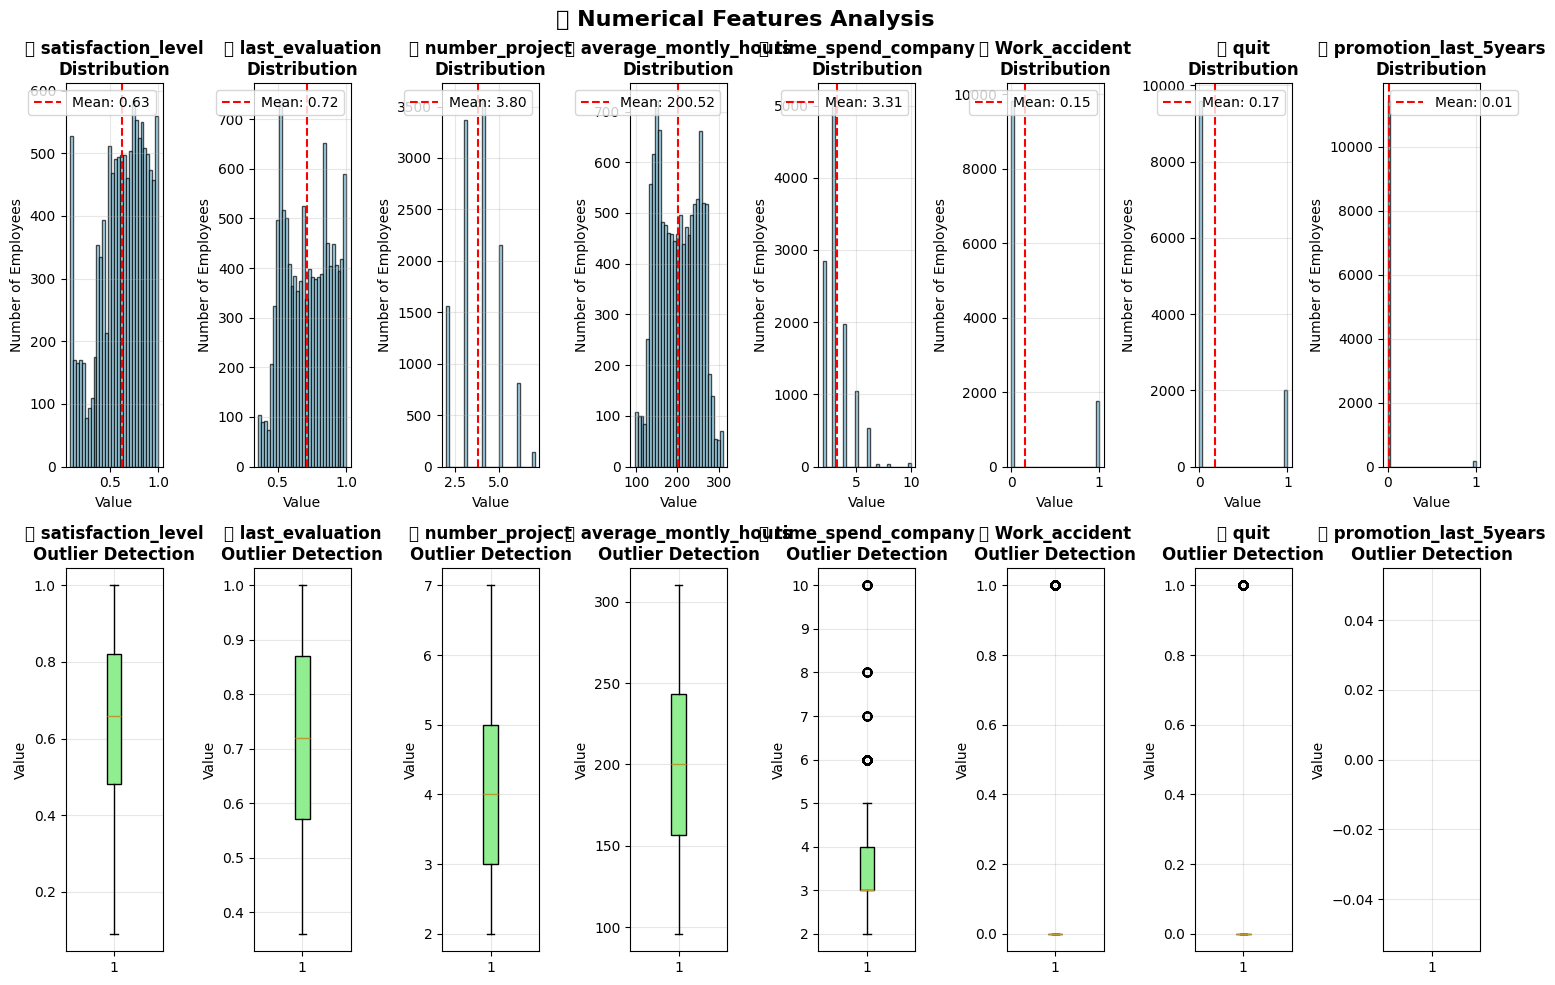


🔗 CORRELATION ANALYSIS:
Correlation tells us how strongly two features are related.
• 1.0 = Perfect positive relationship (as one goes up, other goes up)
• 0.0 = No relationship
• -1.0 = Perfect negative relationship (as one goes up, other goes down)

Correlation Matrix:
                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level                  1.000            0.095          -0.132   
last_evaluation                     0.095            1.000           0.278   
number_project                     -0.132            0.278           1.000   
average_montly_hours               -0.010            0.269           0.341   
time_spend_company                 -0.178            0.116           0.212   
Work_accident                       0.042           -0.004          -0.006   
quit                               -0.356            0.012           0.029   
promotion_last_5years               0.021           -0.007           0.000   

                       a

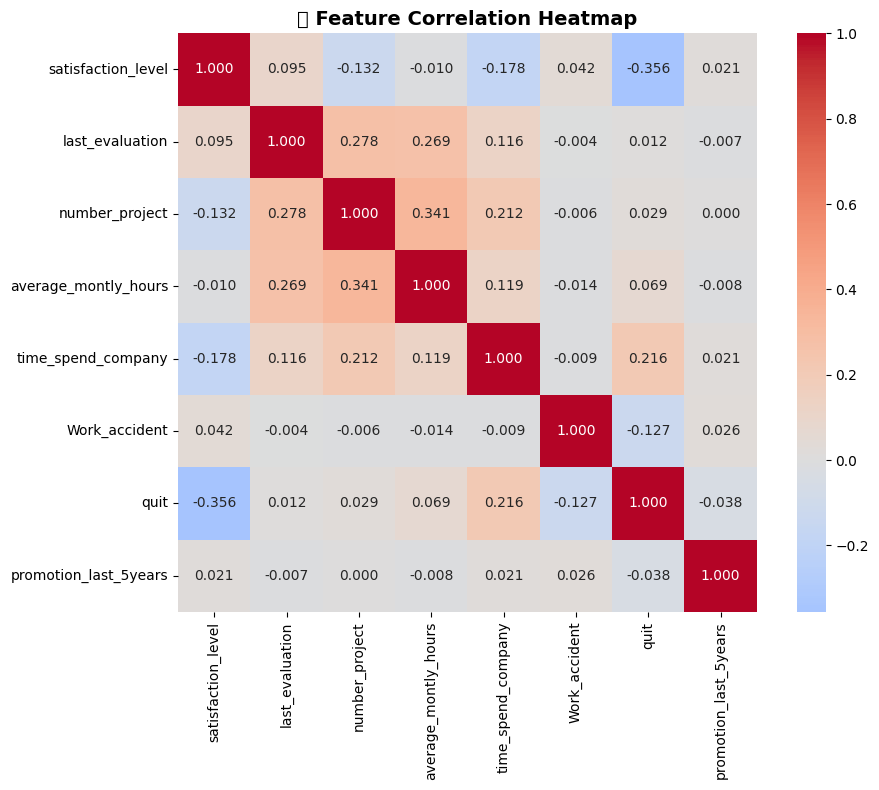

In [6]:
# 📊 Step 4: Create visualizations for numerical features
print("📊 CREATING VISUALIZATIONS FOR NUMERICAL FEATURES...")
print("="*50)

# Set up the plotting area with multiple subplots
# We'll create 2 rows: histograms on top, box plots on bottom
fig, axes = plt.subplots(2, len(numerical_cols), figsize=(15, 10))
fig.suptitle('📊 Numerical Features Analysis', fontsize=16, fontweight='bold')

# If we only have one numerical column, axes won't be 2D
if len(numerical_cols) == 1:
    axes = axes.reshape(2, 1)

for i, col in enumerate(numerical_cols):
    # 📈 Top row: Histograms (show distribution shape)
    # A histogram shows how many employees have values in different ranges
    axes[0, i].hist(df[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, i].set_title(f'📈 {col}\nDistribution', fontweight='bold')
    axes[0, i].set_xlabel('Value')
    axes[0, i].set_ylabel('Number of Employees')
    axes[0, i].grid(True, alpha=0.3)
    
    # Add mean line (average value)
    mean_val = df[col].mean()
    axes[0, i].axvline(mean_val, color='red', linestyle='--', 
                       label=f'Mean: {mean_val:.2f}')
    axes[0, i].legend()
    
    # 📦 Bottom row: Box plots (show outliers and quartiles)
    # A box plot shows the "box" containing 50% of the data and whiskers for the rest
    box_plot = axes[1, i].boxplot(df[col], patch_artist=True)
    box_plot['boxes'][0].set_facecolor('lightgreen')
    axes[1, i].set_title(f'📦 {col}\nOutlier Detection', fontweight='bold')
    axes[1, i].set_ylabel('Value')
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 🔍 Step 5: Correlation analysis (how features relate to each other)
print("\n🔗 CORRELATION ANALYSIS:")
print("="*40)
print("Correlation tells us how strongly two features are related.")
print("• 1.0 = Perfect positive relationship (as one goes up, other goes up)")
print("• 0.0 = No relationship")
print("• -1.0 = Perfect negative relationship (as one goes up, other goes down)")
print()

correlation_matrix = df[numerical_cols].corr()
print("Correlation Matrix:")
print(correlation_matrix.round(3))

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,           # Show correlation values
            cmap='coolwarm',      # Color scheme
            center=0,             # Center colormap at 0
            square=True,          # Make cells square-shaped
            fmt='.3f')            # Format numbers to 3 decimal places
plt.title('🔗 Feature Correlation Heatmap', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

## 🏷️ Step 5: Analyzing Categorical Features

Now let's explore our categorical features! These are like labels or categories - think of them as different groups or types. For example: departments (Sales, IT, HR), education levels (Bachelor's, Master's), or job roles.

### What we'll discover:
- 📋 **Categories**: What different groups exist in each feature?
- 📊 **Frequency**: How many employees are in each category?
- 🎯 **Patterns**: Are some categories more common than others?
- 🔍 **Relationships**: How do categories relate to employee leaving?

In [7]:
# 🏷️ Step 1: Identify categorical columns
# These are columns with text or categories (not numbers we can do math with)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("🏷️ CATEGORICAL FEATURES:")
print("="*40)
for i, col in enumerate(categorical_cols, 1):
    print(f"{i}. {col}")
print(f"\nTotal categorical features: {len(categorical_cols)}")

# 📊 Step 2: Explore each categorical feature
print("\n📊 CATEGORICAL FEATURE ANALYSIS:")
print("="*50)

for col in categorical_cols:
    print(f"\n🔍 {col.upper()}:")
    print("-" * 30)
    
    # Count how many employees are in each category
    value_counts = df[col].value_counts()
    
    print(f"Number of unique categories: {df[col].nunique()}")
    print(f"Most common category: '{value_counts.index[0]}' ({value_counts.iloc[0]:,} employees)")
    
    # Show all categories and their counts
    print("\nCategory breakdown:")
    for category, count in value_counts.items():
        percentage = (count / len(df)) * 100
        print(f"  • {category:20} → {count:5,} employees ({percentage:5.1f}%)")
    
    # Check for any missing or unusual values
    if df[col].isnull().sum() > 0:
        print(f"⚠️ Missing values: {df[col].isnull().sum()}")
    
    print()  # Add space between features

🏷️ CATEGORICAL FEATURES:
1. department
2. salary

Total categorical features: 2

📊 CATEGORICAL FEATURE ANALYSIS:

🔍 DEPARTMENT:
------------------------------
Number of unique categories: 10
Most common category: 'sales' (3,092 employees)

Category breakdown:
  • sales                → 3,092 employees ( 26.7%)
  • technical            → 2,227 employees ( 19.2%)
  • support              → 1,790 employees ( 15.5%)
  • IT                   →   935 employees (  8.1%)
  • RandD                →   689 employees (  5.9%)
  • product_mng          →   638 employees (  5.5%)
  • marketing            →   633 employees (  5.5%)
  • accounting           →   611 employees (  5.3%)
  • hr                   →   601 employees (  5.2%)
  • management           →   365 employees (  3.2%)
⚠️ Missing values: 1


🔍 SALARY:
------------------------------
Number of unique categories: 3
Most common category: 'low' (5,583 employees)

Category breakdown:
  • low                  → 5,583 employees ( 48.2%)
  • me

📊 CREATING VISUALIZATIONS FOR CATEGORICAL FEATURES...


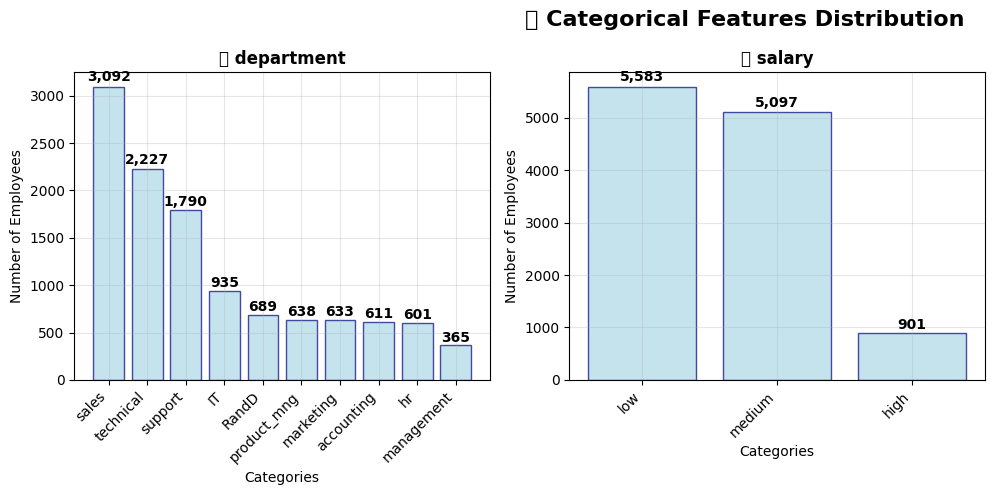


🎯 CATEGORY DISTRIBUTION PATTERNS:

📊 department:
  • Total categories: 10
  • Most common: 26.7% of employees
  • Least common: 3.2% of employees
  ✅ Relatively balanced distribution

📊 salary:
  • Total categories: 3
  • Most common: 48.2% of employees
  • Least common: 7.8% of employees
  ✅ Relatively balanced distribution


In [8]:
# 📊 Step 3: Create visualizations for categorical features
print("📊 CREATING VISUALIZATIONS FOR CATEGORICAL FEATURES...")
print("="*55)

# Calculate how many rows and columns we need for our subplots
n_categorical = len(categorical_cols)
n_cols = 3  # 3 charts per row
n_rows = (n_categorical + n_cols - 1) // n_cols  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.suptitle('🏷️ Categorical Features Distribution', fontsize=16, fontweight='bold')

# Handle case where we have only one row
if n_rows == 1:
    axes = axes.reshape(1, -1)
elif n_categorical == 1:
    axes = axes.reshape(-1, 1)

# Create a bar chart for each categorical feature
for i, col in enumerate(categorical_cols):
    row = i // n_cols
    col_idx = i % n_cols
    
    # Get value counts for this feature
    value_counts = df[col].value_counts()
    
    # Create bar chart
    bars = axes[row, col_idx].bar(range(len(value_counts)), 
                                  value_counts.values, 
                                  color='lightblue', 
                                  edgecolor='navy', 
                                  alpha=0.7)
    
    # Customize the chart
    axes[row, col_idx].set_title(f'📊 {col}', fontweight='bold')
    axes[row, col_idx].set_xlabel('Categories')
    axes[row, col_idx].set_ylabel('Number of Employees')
    
    # Set category names on x-axis (rotated for readability)
    axes[row, col_idx].set_xticks(range(len(value_counts)))
    axes[row, col_idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    
    # Add value labels on top of bars
    for bar, count in zip(bars, value_counts.values):
        axes[row, col_idx].text(bar.get_x() + bar.get_width()/2, 
                               bar.get_height() + bar.get_height()*0.01,
                               f'{count:,}', 
                               ha='center', va='bottom', fontweight='bold')
    
    axes[row, col_idx].grid(True, alpha=0.3)

# Hide empty subplots if we have any
for i in range(len(categorical_cols), n_rows * n_cols):
    row = i // n_cols
    col_idx = i % n_cols
    axes[row, col_idx].set_visible(False)

plt.tight_layout()
plt.show()

# 🎯 Step 4: Analyze category distribution patterns
print("\n🎯 CATEGORY DISTRIBUTION PATTERNS:")
print("="*40)

for col in categorical_cols:
    value_counts = df[col].value_counts()
    
    # Calculate distribution metrics
    total_categories = len(value_counts)
    most_common_pct = (value_counts.iloc[0] / len(df)) * 100
    least_common_pct = (value_counts.iloc[-1] / len(df)) * 100
    
    print(f"\n📊 {col}:")
    print(f"  • Total categories: {total_categories}")
    print(f"  • Most common: {most_common_pct:.1f}% of employees")
    print(f"  • Least common: {least_common_pct:.1f}% of employees")
    
    # Check if distribution is balanced or skewed
    if most_common_pct > 70:
        print(f"  ⚠️ Highly skewed - most employees in one category")
    elif most_common_pct > 50:
        print(f"  📊 Moderately skewed distribution")
    else:
        print(f"  ✅ Relatively balanced distribution")

## 🎯 Step 6: Target Variable Analysis

Now let's focus on our target variable - the thing we're trying to predict! This is probably whether an employee will leave the company (attrition). Understanding our target is crucial because:

### Why this matters:
- 🏆 **Goal clarity**: This is what our model will predict
- ⚖️ **Balance check**: Are we predicting a rare event or common one?
- 🔍 **Insight discovery**: What patterns exist in who leaves vs. stays?
- 🎛️ **Model strategy**: Helps us choose the right approach

### What we'll discover:
- 📊 **Distribution**: How many employees leave vs. stay?
- 🔄 **Balance**: Is our dataset balanced or imbalanced?
- 📈 **Relationships**: Which features influence leaving the most?

In [9]:
# 🎯 Step 1: Identify the target variable
# Let's look for the column that indicates whether employee left
target_candidates = ['Attrition', 'attrition', 'Left', 'left', 'Turnover', 'turnover', 
                    'Quit', 'quit', 'Exit', 'exit', 'Churn', 'churn']

target_col = None
for col in df.columns:
    if col in target_candidates or any(candidate.lower() in col.lower() for candidate in target_candidates):
        target_col = col
        break

if target_col:
    print(f"🎯 TARGET VARIABLE FOUND: '{target_col}'")
else:
    print("❓ Target variable not automatically detected. Let's examine all columns:")
    for col in df.columns:
        unique_vals = df[col].nunique()
        if unique_vals <= 5:  # Likely categorical with few categories
            print(f"  • {col}: {unique_vals} unique values → {df[col].unique()}")
    
    # If we can't find it automatically, let's assume it's a common name
    # You might need to adjust this based on your actual dataset
    possible_targets = [col for col in df.columns if df[col].nunique() == 2]
    if possible_targets:
        target_col = possible_targets[0]
        print(f"\n🎯 ASSUMING TARGET VARIABLE: '{target_col}' (binary variable)")

if target_col:
    print(f"\n📊 TARGET VARIABLE ANALYSIS: {target_col}")
    print("="*50)
    
    # 📊 Step 2: Basic target distribution
    target_counts = df[target_col].value_counts()
    target_percentages = df[target_col].value_counts(normalize=True) * 100
    
    print("Distribution:")
    for value, count in target_counts.items():
        percentage = target_percentages[value]
        print(f"  • {value}: {count:,} employees ({percentage:.1f}%)")
    
    # ⚖️ Step 3: Check for class imbalance
    print(f"\n⚖️ CLASS BALANCE ANALYSIS:")
    print("-" * 30)
    
    minority_class_pct = target_percentages.min()
    majority_class_pct = target_percentages.max()
    
    print(f"Minority class: {minority_class_pct:.1f}%")
    print(f"Majority class: {majority_class_pct:.1f}%")
    print(f"Imbalance ratio: {majority_class_pct/minority_class_pct:.1f}:1")
    
    if minority_class_pct < 10:
        balance_status = "🔴 Severely imbalanced"
        balance_note = "Will need special techniques (SMOTE, class weights, etc.)"
    elif minority_class_pct < 20:
        balance_status = "🟡 Moderately imbalanced"
        balance_note = "Consider class weights or sampling techniques"
    elif minority_class_pct < 40:
        balance_status = "🟠 Slightly imbalanced"
        balance_note = "Might benefit from class weights"
    else:
        balance_status = "🟢 Well balanced"
        balance_note = "Good for standard ML algorithms"
    
    print(f"Status: {balance_status}")
    print(f"Recommendation: {balance_note}")
else:
    print("❌ Could not identify target variable. Please specify manually.")

🎯 TARGET VARIABLE FOUND: 'quit'

📊 TARGET VARIABLE ANALYSIS: quit
Distribution:
  • 0: 9,582 employees (82.7%)
  • 1: 2,000 employees (17.3%)

⚖️ CLASS BALANCE ANALYSIS:
------------------------------
Minority class: 17.3%
Majority class: 82.7%
Imbalance ratio: 4.8:1
Status: 🟡 Moderately imbalanced
Recommendation: Consider class weights or sampling techniques


📊 CREATING TARGET VARIABLE VISUALIZATIONS...


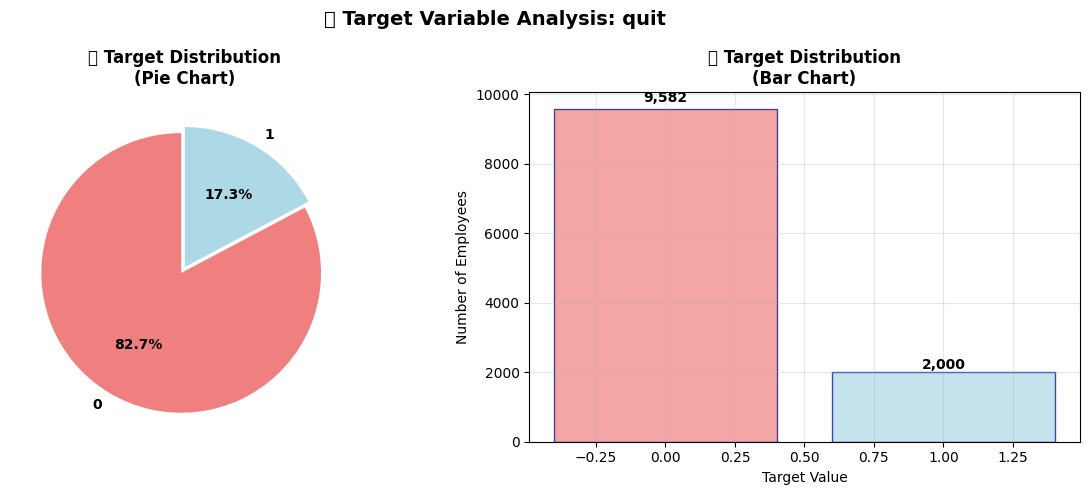


🔍 TARGET vs NUMERICAL FEATURES:
Average values by target group:

📊 satisfaction_level:
  • 0: 0.67
  • 1: 0.44
  • Difference: 0.23 (41.1%)

📊 last_evaluation:
  • 0: 0.72
  • 1: 0.72
  • Difference: 0.01 (0.7%)

📊 number_project:
  • 0: 3.79
  • 1: 3.88
  • Difference: 0.09 (2.3%)

📊 average_montly_hours:
  • 0: 198.98
  • 1: 207.91
  • Difference: 8.93 (4.4%)

📊 time_spend_company:
  • 0: 3.19
  • 1: 3.88
  • Difference: 0.69 (19.6%)

📊 Work_accident:
  • 0: 0.17
  • 1: 0.05
  • Difference: 0.12 (107.1%)

📊 quit:
  • 0: 0.00
  • 1: 1.00
  • Difference: 1.00 (200.0%)

📊 promotion_last_5years:
  • 0: 0.02
  • 1: 0.00
  • Difference: 0.01 (119.5%)

📋 TARGET vs CATEGORICAL FEATURES:
Target distribution within each category:

🏷️ department:
  • IT:
    - 0: 83.0%
    - 1: 17.0%
  • RandD:
    - 0: 87.5%
    - 1: 12.5%
  • accounting:
    - 0: 82.0%
    - 1: 18.0%
  • hr:
    - 0: 81.2%
    - 1: 18.8%
  • management:
    - 0: 85.8%
    - 1: 14.2%
  • marketing:
    - 0: 82.3%
    - 1: 17.

In [10]:
# 📊 Step 4: Visualize target variable distribution
if target_col:
    print("📊 CREATING TARGET VARIABLE VISUALIZATIONS...")
    print("="*45)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f'🎯 Target Variable Analysis: {target_col}', fontsize=14, fontweight='bold')
    
    # Pie chart - shows proportions clearly
    target_counts = df[target_col].value_counts()
    colors = ['lightcoral', 'lightblue']
    explode = (0.05, 0)  # Slightly separate the slices
    
    axes[0].pie(target_counts.values, 
                labels=target_counts.index, 
                autopct='%1.1f%%',
                colors=colors,
                explode=explode,
                startangle=90,
                textprops={'fontweight': 'bold'})
    axes[0].set_title('🥧 Target Distribution\n(Pie Chart)', fontweight='bold')
    
    # Bar chart - shows actual numbers clearly
    bars = axes[1].bar(target_counts.index, target_counts.values, 
                       color=colors, alpha=0.7, edgecolor='navy')
    axes[1].set_title('📊 Target Distribution\n(Bar Chart)', fontweight='bold')
    axes[1].set_xlabel('Target Value')
    axes[1].set_ylabel('Number of Employees')
    
    # Add value labels on bars
    for bar, count in zip(bars, target_counts.values):
        axes[1].text(bar.get_x() + bar.get_width()/2, 
                     bar.get_height() + bar.get_height()*0.01,
                     f'{count:,}', 
                     ha='center', va='bottom', fontweight='bold')
    
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 🔍 Step 5: Analyze target relationships with other features
    print(f"\n🔍 TARGET vs NUMERICAL FEATURES:")
    print("="*40)
    
    # For numerical features, compare averages between target groups
    if len(numerical_cols) > 0:
        print("Average values by target group:")
        print()
        
        target_groups = df.groupby(target_col)[numerical_cols].mean()
        
        for col in numerical_cols:
            print(f"📊 {col}:")
            for target_value in target_groups.index:
                avg_value = target_groups.loc[target_value, col]
                print(f"  • {target_value}: {avg_value:.2f}")
            
            # Calculate the difference between groups
            if len(target_groups) == 2:
                diff = abs(target_groups[col].iloc[1] - target_groups[col].iloc[0])
                diff_pct = (diff / target_groups[col].mean()) * 100
                print(f"  • Difference: {diff:.2f} ({diff_pct:.1f}%)")
            print()
    
    # 📋 Step 6: Analyze target relationships with categorical features
    print(f"📋 TARGET vs CATEGORICAL FEATURES:")
    print("="*40)
    
    if len(categorical_cols) > 0:
        print("Target distribution within each category:")
        print()
        
        for col in categorical_cols:
            print(f"🏷️ {col}:")
            
            # Create a cross-tabulation (contingency table)
            crosstab = pd.crosstab(df[col], df[target_col], normalize='index') * 100
            
            for category in crosstab.index:
                print(f"  • {category}:")
                for target_value in crosstab.columns:
                    percentage = crosstab.loc[category, target_value]
                    print(f"    - {target_value}: {percentage:.1f}%")
            print()
            
            # Identify categories with highest/lowest target rates
            if len(crosstab.columns) == 2:
                # Assuming binary target, get the rate of the positive class
                target_rates = crosstab.iloc[:, 1]  # Second column (usually 'Yes', 'Left', etc.)
                highest_rate_cat = target_rates.idxmax()
                lowest_rate_cat = target_rates.idxmin()
                
                print(f"  📈 Highest rate: {highest_rate_cat} ({target_rates.max():.1f}%)")
                print(f"  📉 Lowest rate: {lowest_rate_cat} ({target_rates.min():.1f}%)")
                print()

else:
    print("⚠️ Skipping target analysis - target variable not identified")

## 💡 Step 7: Key Insights & Next Steps

Congratulations! 🎉 You've completed your first comprehensive Exploratory Data Analysis. Let's summarize what we discovered and plan our next moves.

### 🔍 What We Learned:

#### 📊 **Data Quality**
- ✅ Checked for missing values and duplicates
- ✅ Verified data types and basic statistics
- ✅ Identified any data quality issues

#### 🔢 **Numerical Features**
- ✅ Found patterns in continuous variables
- ✅ Detected outliers using statistical methods
- ✅ Understood feature distributions and relationships

#### 🏷️ **Categorical Features**  
- ✅ Explored different categories and their frequencies
- ✅ Identified balanced vs. imbalanced features
- ✅ Understood the diversity in categorical data

#### 🎯 **Target Variable**
- ✅ Analyzed target distribution and balance
- ✅ Found relationships between features and target
- ✅ Identified important patterns for prediction

### 🚀 **Next Steps in Our ML Journey:**

1. **📊 Feature Engineering** (Next Notebook)
   - Create new features from existing ones
   - Handle categorical variables (encoding)
   - Scale numerical features
   - Feature selection

2. **⚖️ Class Imbalance Handling** (Notebook 3)
   - Apply SMOTE or other sampling techniques
   - Use class weights
   - Evaluate different approaches

3. **🤖 Model Training** (Notebook 4)
   - Train multiple algorithms
   - Hyperparameter tuning
   - Cross-validation

4. **📈 Model Evaluation** (Notebook 5)
   - Compare model performance
   - Feature importance analysis
   - Final model selection

### 💭 **Remember:**
- EDA is iterative - you can always come back and explore more
- Every insight here helps inform our modeling decisions
- The patterns we found will guide feature engineering
- Understanding your data is the foundation of successful ML!

In [11]:
# 📋 Final Summary: Our Dataset at a Glance
print("📋 FINAL DATASET SUMMARY")
print("="*50)

print(f"🗃️ Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n📊 Feature Types:")
print(f"  • Numerical features: {len(numerical_cols)}")
print(f"  • Categorical features: {len(categorical_cols)}")

if target_col:
    print(f"\n🎯 Target Variable: {target_col}")
    target_dist = df[target_col].value_counts(normalize=True) * 100
    for value, pct in target_dist.items():
        print(f"  • {value}: {pct:.1f}%")

print(f"\n✅ Data Quality:")
print(f"  • Missing values: {df.isnull().sum().sum()}")
print(f"  • Duplicate rows: {df.duplicated().sum()}")

# Quick feature importance hint
if target_col and len(numerical_cols) > 0:
    print(f"\n🔍 Quick Insights:")
    correlations = df[numerical_cols + [target_col]].corr()[target_col].abs().sort_values(ascending=False)[1:]
    if len(correlations) > 0:
        top_corr_feature = correlations.index[0]
        top_corr_value = correlations.iloc[0]
        print(f"  • Strongest numerical correlation with target: {top_corr_feature} ({top_corr_value:.3f})")

print(f"\n🚀 Ready for Feature Engineering!")
print("="*50)
print("You now have a solid understanding of your data.")
print("Time to move to the next notebook: 02_feature_engineering.ipynb")
print("💡 Pro tip: Keep this analysis handy as a reference!")

📋 FINAL DATASET SUMMARY
🗃️ Dataset Shape: 11,582 rows × 10 columns
💾 Memory Usage: 2.09 MB

📊 Feature Types:
  • Numerical features: 8
  • Categorical features: 2

🎯 Target Variable: quit
  • 0: 82.7%
  • 1: 17.3%

✅ Data Quality:
  • Missing values: 3
  • Duplicate rows: 9

🔍 Quick Insights:


TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'